<div align="center">
    <img src="https://logoyab.com/wp-content/uploads/2024/08/IUST-University-Logo-1030x1030.png" alt="Logo" width="200">
    <p><b>Project2 @ AI Course, Dr. Abdi</b></p>
    <p><b>ِDesinged by kasra shariati & Amirhossein Hosseini</b></p>
</div>

--------


*Full Name:* AmirHossein Eslami

*Student Number:* 400411099

------

**Welcome to the Second AI assignment (:**

In [1]:
#DO NOT IMPORT ANY OTHER LIBRARY
#Run these cells as it is
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
from tqdm import tqdm
from copy import deepcopy
import seaborn as sns
try:
    import plotly.graph_objects as go
except:
    !pip install plotly # Or install the plotly library manually
    import plotly.graph_objects as go

# required only for jupyter notebooks / while running on colab
%matplotlib inline

# set seed
seed = 1
np.random.seed(seed)

# Part I - Data pre-processing + linear regression

## Standardization

Standardizing the data is a good practice. Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Standardizing features helps us in training the model faster.

The formula for standardizing the data is given below:

# $X′= \frac{X−μ}{σ}\hspace{4cm}-(a)$

where

μ : mean of the attribute

σ : standard deviation of the attribute

Numpy provides functions to implement the above

For additional information refer [this](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff).

Note: You do not need to standardize Y

In [2]:
def standardize(X):
    """
    Args:
        'X': numpy ndarray
    Returns:
        'X_norm': normalized X also in numpy ndarray format
    """
    # START TODO ################
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    # END TODO ###################

    raise NotImplementedError()


In [3]:
# Sample test cases
np.random.seed(seed)
x = np.random.randint(0, 100, size = 10)
x = standardize(x)
assert np.allclose(x[1], -0.8183755)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [4]:
# hidden test cases. Do not modify

## Initialize parameters

As uncomplicated it may seem, initializing your weights play an important role in overall performance of your model. If initial wts. are too small/large then it may lead to problem of vanishing/emploding gradients respectively.

For introductory purpose, we will be taking weights from Gaussian Distribution. But there are has been tremendous research in this area, and Xavier Initialization has proved to be very effective for multiple tasks. There are in-built methods for Xavier initialization in frameworks like tensorflow, pytorch, caffe. To understand the maths behind Xavier Initialization, refer to the article attached below!

Refer to this article to understand the importance of effective initialization. [deeplearning.ai/notes](https://www.deeplearning.ai/ai-notes/initialization/#IV)

For our model we will be initialising Weights as an array or random integers and bias as array of zeroes. You can take help of formula $(i)$ from the next section's theory i.e. forward to know the relation between the dimensions of W and b with respect to X and Y.

###
Initialise weights with the shape given in function below having values **between 0 and 1** using numpy.random.rand function.

(NOTE : USE **numpy.random.rand** function for this. Different functions can create different random values and this might result in your code not passing the test cases)

> Initialise bias with the shape given below as a numpy array having all zeros.

In [5]:
def initialize_parameters(X, Y):
    """
    Args:
    'Y': ndarray of shape (m,output_size)
    'X': ndarray of shape (m, no. of features)
    Returns:
    'W', 'b': Wts. and biases
    'W' : ndarray of shape(no. of features, output_size)
    'b' : ndarray of shape(1, output_size)

    USE output_size = 1 since we are only predicting median_house_value.
    IF we predicting say house price and no of people that can stay in it, then we would require output_size = 2 and so on.
    """
    # START TODO ################
    np.random.seed(1)
    n_x = X.shape[1]
    n_y = Y.shape[1]
    W = np.random.rand(n_x, n_y)
    b = np.zeros((1, n_y))
    return W, b
    # END TODO ###################

    raise NotImplementedError()

In [6]:
# sample test case
W_check, b_check = initialize_parameters(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
np.random.seed(seed)
W_check, b_check = initialize_parameters(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
assert W_check.shape == (2,1)
assert b_check.shape == (1,1)
assert np.allclose(W_check[0],[0.417022004702574])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [7]:
# hidden test cases. Do not modify

## Forward

This is the function where actual calculation of the prediction values happen with the help of weights and bias.

For two varaibles it is a straight line of form $y = mx + c$ there m and c are slope and intercepts of line respectively but for more than one variables since each variable contributes to the output value the equation becomes a dot product of weights with the variables. Where each weight ($w_i$) represent the propotionality factor of prediction values with respect to the corresponding variable ($x_i$). $b$ is refered as bias which is analogus to the intercept value in case of two variables.

# $ \boxed{Y_{pred} = w_1 x_1 + w_2 x_2 + .... + w_i x_i + b}\hspace{4cm} -(i)$

or

# $ Y_{pred} = X \cdot W + b$

In [8]:
def forward(X, W, b):
    """
    Args:
    'X': ndarray of shape (m,no.of features)
    'W': ndarray of shape (no. of features, output_size)
    'b': ndarray of shape (1, output_size)
    Returns:
    calculated Y_pred value using X,W and b
    """
    # START TODO ################
    return np.dot(X,W) + b
    # END TODO ###################
    raise NotImplementedError()

In [9]:
#sample test case
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
X_test = np.random.randn(2,1)
np.random.seed(seed+1)
W_test = np.random.randn(1,2)
np.random.seed(seed+2)
b_test = np.random.randn(1,2)
forward_test = forward(X_test, W_test, b_test)
assert np.allclose(forward_test, [[1.1116698 , 0.34511309],[2.04358276, 0.47093144]])
print('Sample Test passed', '\U0001F44D')


Sample Test passed 👍


In [10]:
# hidden test cases. Do not modify

## Loss

A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. There is not a single loss function that works for all kind of data. It depends on a number of factors including the presence of outliers, choice of machine learning algorithm, time efficiency of gradient descent, ease of finding the derivatives and confidence of predictions.

For our dataset, we have chosen Mean Square Error because of its ease of implementation and competitive performance with other loss functions.

# $ MSE = \frac{\sum_{i = 1}^{m} ({Y^{pred}_i - Y^{true}_i})^2}{2m}$

here $Y^{pred}_i$ is the $i^{th}$ prediction value corresponding to $i^{th}$  $Y^{true}_i$ (actual)value.
$m$ is the number of actual values

In [11]:
def loss(y_pred, y_true):
    """
    Args:
    'y_pred': ndarray of shape (m,1) storing output predictions
    'y_true': ndarray of shape (m,1) storing true house prices
    Returns:
    'mse': mean square error
    """

    # START TODO ################
    m = y_pred.shape[0]
    diff = y_pred - y_true
    mse = np.sum(diff ** 2) / (2 * m)
    return mse

    # END TODO###################
    raise NotImplementedError()

In [12]:
#sample test case
np.random.seed(seed)
y1 = np.random.randn(10,1)
np.random.seed(seed+1)
y2 = np.random.randn(10,1)
mse_sample = loss(y1, y2)
assert np.allclose(mse_sample, 1.38652357)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [13]:
# hidden test cases. Do not modify

## Gradients

In order to optimise our model and increase it's accuracy we will use a technique called **Stochastic Gradient Decent**(SGD). As per wikipedia Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. From this we understand that we would be minimising the error between our prediction values and actual values.
But before that we need to calculate our prediction values using the same formula as in the forward function.

Now after getting certain value of loss in our first prediction we would change our weights and bias in a manner that our loss reduces.

# $W_j = W_{j-1} - \frac{\partial L(Y_p)}{\partial W}$

where $W_j$ stands for weight at $j^{th}$ iteration and $\frac{\partial L(Y_p)}{\partial W}$ stands for partial derivative of Loss function with respect to weights. Above formula upon partial differentiation simplifies to

# $\boxed{W_j = W_{j-1} - \alpha * dW }     \hspace{3cm}    -(ii)$

where $\alpha$ is a constant called **learning rate** and dW is the partial derivative part given by the following formula

# $ dW = \frac{\partial L(Y_p)}{\partial Y}\frac{\partial Y}{\partial W} = \frac{2((WX + b) - Y_t)}{2m}* (X)  $

or:

# $ dW = \frac{\partial L(Y_p)}{\partial W} =  \frac{X^T*(Y_p - Y_t)}{m}  $

The $ {X^T} $ implies Transpose of  $ X $ (Just try to matrix multiply $ X $ directly with  $ (Y_p - Y_t) $ and you'll understand why we need to use transpose of X in multiplication)

<br/>
Similar analysis can be done for bias(b)

# $b_j = b_{j-1} - \frac{\partial L(Y_p)}{\partial b}$

which can also be written as

# $\boxed{b_j = b_{j-1} - \alpha * db }      \hspace{3cm}    -(iii)$

# $ db = \frac{\partial L(Y_p)}{\partial b} =  \sum\frac{(Y_p - Y_t)}{m}  $

$dW$ and $db$ are together refered as gradients

In [14]:
def grads(X, y_pred, y_true):
    """
    Args:
    'X': The input matrix
    'y_pred': ndarray of shape (m,1) storing output predictions
    'y_true': ndarray of shape (m,1) storing true house prices
    Returns:
    'dW': gradients of weights
    'db': gradient of biases
    """

    # START TODO ################
    m = y_pred.shape[0]
    dw = np.dot(X.T, (y_pred - y_true)) / m
    db = np.sum(y_pred - y_true) / m
    return dw, db

    # END TODO###################
    raise NotImplementedError()

In [15]:
#sample Test Case for function grads
np.random.seed(seed)
X_test = np.random.randn(6,3)
np.random.seed(seed+1)
y_pred_test = np.random.randn(6,1)
np.random.seed(seed+2)
y_true_test = np.random.randn(6,1)
gradsop = grads(X_test,y_pred_test,y_true_test)
assert np.allclose(gradsop[0],[[-1.13308432],[ 1.40189064],[-1.15382273]])
assert np.allclose(gradsop[1],-0.5716881366021288)
print('Hidden Test passed', '\U0001F44D')

Hidden Test passed 👍


In [16]:
# hidden test cases. Do not modify

## Stochastic Gradient Decent

After calculating gradients of weights and bias, we will now do the changes in their respective values with the help of expressions $(ii)$ and $(iii)$ discussed above.
Learning Rate ($\alpha$) gives the measure of The amount that the weights are updated during training. Its value lies between 0.0 and 1.0.

The weights are now updated via the learning rules:

$$ W = W - \alpha \text{ } dW $$
$$ b = b - \alpha \text{ } db $$

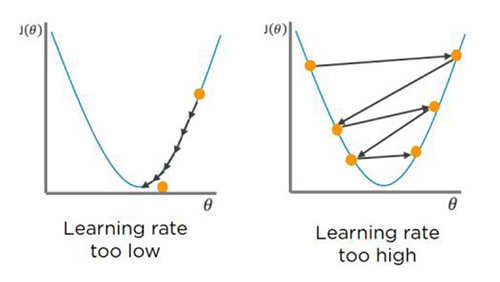

In the above two graphs we see the effect of high learning rates and effect of low learning rates. Each arrow depicts the change in the value at each subsequent step. A higher learning rate might saturate fast towards the local minimum where as the low learning rate takes much more iterations. But high learning rate might also start moving away from the local minimum hence increasing the loss.


In [17]:
def sgd(W, b, grads, alpha):
    """
    Args:
    'W' : (n, output_size) array
    'b' : (1,output_size)
    'grads': list of dW, db
    'alpha': learning rate
    Return:
    Updated parameters
    updated_w : updated value of 'W' using the formula given above
    updated_b : updated value of 'b' using the formula given above
    """

    # START TODO ################
    dW, db = grads
    W -= alpha * dW
    b -= alpha * db
    return W, b

    # END TODO ###################
    raise NotImplementedError()

In [18]:
#Sample test case for function sgd
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
w_test = np.random.randn(2,1)
np.random.seed(seed+1)
b_test = np.random.randn(1,1)
sgdop = sgd(w_test,b_test,[w_test,b_test],0.01)
assert np.allclose(sgdop[0],[[ 1.60810191],[-0.60563885]])
assert np.allclose(sgdop[1],[[-0.41259027]])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [19]:
# hidden test cases. Do not modify

## Build Model

Congratulations! Now we have all the helper functions required to build our model. In this final function, we will call above functions in a systematic way and let our model train on given dataset. Follow the instructions carefully.

### Steps to follow for building the model
The following operations need to be performed in the function "model" below:
<br/>
<br/>
1) Standardize X and Y which are input to the model (Note that X and Y are currently NOT standardized)

2) Ensure shape of X is (m,no.of features) where m is the number of data points and no. of features is 8

3) Initialise the parameters W and b using the STANDARDIZED X and Y with the help of the function *initialize_parameters*

4) For N number of iterations :

    - Calculate y_predicted by performing a forward pass(No need to standardize this y_predicted)
    
    - Find out the loss using y_predicted and y_true
    
    - Append the current loss to a list of all losses so that we can return it and plot it
    
    - Calculate the Gradients
    
    - Update W and b using SGD
    
    - Now use these updated W and b to perform a forward pass in the next iteration and again compute loss, gradients,sgd and so on
    
NOTE : Use all the functions you have declared uptill now in the model function

In [20]:
# Main model function
def model(X, Y, iterations=1500, learning_rate=0.009):
    """
    Args:
    'X': ndarray of shape (m,no. of features) which is NOT Standardized
    'Y': ndarray of shape (m,1) which is NOT Standardized
    'iterations': iterations for training our data
    Returns:
    y_pred: predicted value of output
    y_true: true value of output (The 'Y' argument after standardization gives y_true)
    losses: for grading purpose
    W , b : The final TRAINED weights and biases of the model
    Return in the following order : [y_pred , y_true, losses , W , b]
    """

    # START TODO ################
    np.random.seed(1)

    losses = []

    X_std = standardize(X)
    Y_std = standardize(Y)

    m, n_x = X.shape

    if n_x != 8:
        print("N of features is not 8!")
        return

    W, b = initialize_parameters(X, Y)

    for i in range(iterations):
        y_predicted = np.dot(X_std, W) + b
        los = loss(y_predicted, Y_std)
        losses.append(los)

        dW, db = grads(X_std, y_predicted, Y_std)
        W, b = sgd(W, b, [dW, db], learning_rate)

    # END TODO ################

    # Plot loss curve
    plt.plot(losses)

    return [y_predicted, Y_std, losses, W, b]

    raise NotImplementedError()

In [21]:
!pip install -U gdown
import gdown

# Convert the Google Drive link to direct-download format
file_id = "1S7E1HiD80eHKk3GhifAwuL8OdQG7KSK5"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="housing_data.csv", quiet=False)

df =  pd.read_csv('/content/housing_data.csv')
df.dropna(axis=1,inplace=True)
X = df.iloc[:,:8]
Y = np.array(df['median_house_value'])
Y = Y.reshape(Y.shape[0],1)
X.head()

Downloading...
From: https://drive.google.com/uc?id=1S7E1HiD80eHKk3GhifAwuL8OdQG7KSK5
To: /content/housing_data.csv
100%|██████████| 1.42M/1.42M [00:00<00:00, 12.6MB/s]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


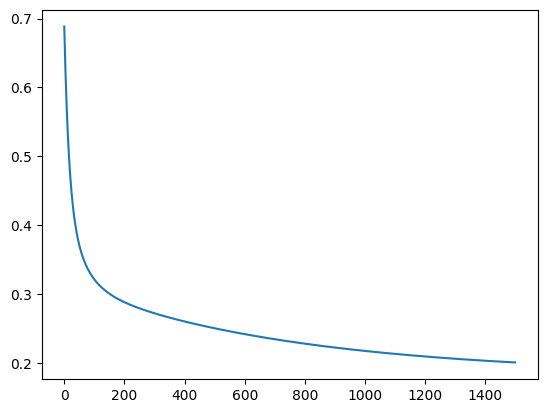

In [22]:
#RUN THIS CELL AS IT IS
np.random.seed(1)
y_pred , y_true, losses , trained_w , trained_b = model(X, Y)

[np.float64(0.6885846540198074), np.float64(0.6707257041704145), np.float64(0.6539079709828864), np.float64(0.6380641473684436), np.float64(0.6231314447049654), np.float64(0.609051284693237), np.float64(0.5957690123749294), np.float64(0.5832336288543027), np.float64(0.571397542366241), np.float64(0.5602163364268841), np.float64(0.5496485538903171), np.float64(0.5396554958159486), np.float64(0.530201034126785), np.float64(0.5212514371091445), np.float64(0.5127752068698618), np.float64(0.5047429279279951), np.float64(0.4971271261748123), np.float64(0.48990213748867356), np.float64(0.48304398534062604), np.float64(0.47653026677231985), np.float64(0.470340046170493), np.float64(0.4644537563019681), np.float64(0.45885310611005425), np.float64(0.45352099480765345), np.float64(0.44844143183439794), np.float64(0.44359946227496194), np.float64(0.438981097363454), np.float64(0.43457324972463846), np.float64(0.4303636730267962), np.float64(0.42634090574343564), np.float64(0.4224942187419215), np.

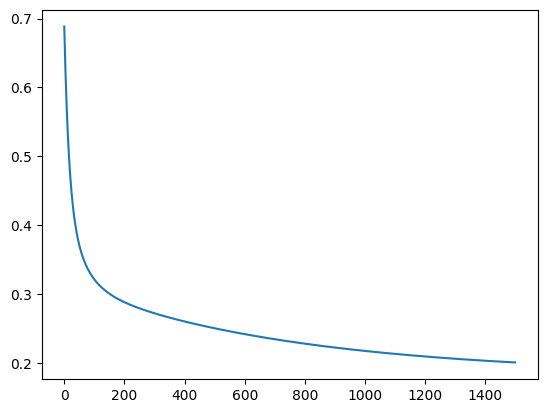

In [23]:
#Sample test case
np.random.seed(1)
y_pred , y_true, losses , trained_w , trained_b = model(X, Y)
print(losses)
assert np.allclose(losses[100], 0.3212234664254295)
print('Sample Test passed', '\U0001F44D')

In [24]:
# hidden test cases. Do not modify

In [25]:
mean_squared_error(y_pred,y_true)

0.40114325177487237

The MSE of linear model is around 0.38 - 0.42 on a scale of 0 - 1.   
In the next section we will compare this score with the MSE obtained by using a Neural Network for the same task.

In [26]:
!pip install -U gdown
import gdown

# Convert the Google Drive link to direct-download format
file_id = "1SwPmCB12OGc0Ljjj4_FafBy5b0TKanPJ"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="california_housing_test.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SwPmCB12OGc0Ljjj4_FafBy5b0TKanPJ
To: /content/california_housing_test.csv
100%|██████████| 301k/301k [00:00<00:00, 4.91MB/s]


'california_housing_test.csv'

In [27]:
#Use this to check the accuracy of our model on Test set
df_test  = pd.read_csv('california_housing_test.csv')
scaler = MinMaxScaler()
scaler.fit(df)
test_scaled_data = scaler.transform(df_test)
test_scaled_df = pd.DataFrame(test_scaled_data,columns=df_test.columns) #make sure column names are retained

xtest = test_scaled_df.iloc[:,0:8]
ytest = test_scaled_df.iloc[:,8:9]
xtest  = xtest.values
ytest = ytest.values.reshape(-1,1)

ytest_pred = forward(xtest,trained_w,trained_b)
print(mean_squared_error(ytest,ytest_pred))

0.10642713642263459


## Visualization of work done so far [ungraded]

Visualisation of data is an important technique which can be used to see the results discretly and at the same time make suitable comparisions with the test cases to check how the model is working. Here we try to plot predicted values and actual values together in one graph with median_income as the independent variable. We also plot a correlation heat map to find out that our dependent variable depends on which factors majorly.



In [28]:
#making copies of data
x_new = X
y_pred_short = y_pred
y_true_short = y_true

#converting numpy arrays to pandas dataframe
df_new = pd.DataFrame(x_new)
df1 = pd.DataFrame(y_pred_short)
df1 = df1.rename(columns={'0': 'predicted_values'})
df2 = pd.DataFrame(y_true_short)
df2 = df2.rename(columns={'0': 'actual_values'})

In [29]:
#reducing dataset from 3000 rows to 100 rows for a clearer and better visualisation
rows_to_drop = [i for i in range(y_true_short.shape[0])]

df1.drop(df1.index[rows_to_drop], inplace = True)
df2.drop(df2.index[rows_to_drop], inplace = True)
df_new.drop(df_new.index[rows_to_drop], inplace = True)

you might be wondering why we are chosing median_salary in our above analysis.

In [30]:
df.corr() #calculating correlation values of all variables with each other

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925176,-0.106824,0.047466,0.071700,0.102994,0.058443,-0.015882,-0.045788
latitude,-0.925176,1.000000,0.010260,-0.038911,-0.069217,-0.112025,-0.073960,-0.079157,-0.143969
housing_median_age,-0.106824,0.010260,1.000000,-0.362034,-0.320873,-0.296285,-0.303109,-0.120161,0.104470
total_rooms,0.047466,-0.038911,-0.362034,1.000000,0.929778,0.856826,0.918234,0.199207,0.135298
total_bedrooms,0.071700,-0.069217,-0.320873,0.929778,1.000000,0.877377,0.979395,-0.007952,0.051111
population,0.102994,-0.112025,-0.296285,0.856826,0.877377,1.000000,0.907291,0.003884,-0.024234
households,0.058443,-0.073960,-0.303109,0.918234,0.979395,0.907291,1.000000,0.013535,0.066573
median_income,-0.015882,-0.079157,-0.120161,0.199207,-0.007952,0.003884,0.013535,1.000000,0.689109
median_house_value,-0.045788,-0.143969,0.104470,0.135298,0.051111,-0.024234,0.066573,0.689109,1.000000


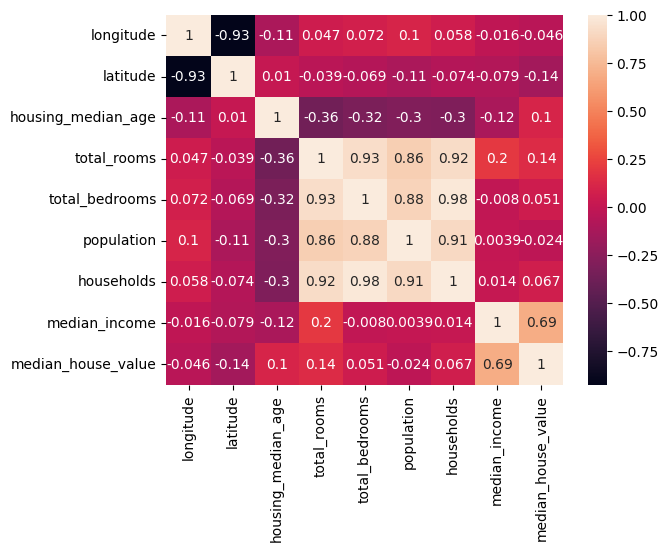

In [31]:
sns.heatmap(df.corr(), annot = True)
plt.show()

variables depend more on each other if the correlation values are less than -0.5 or greater than 0.5 . hence we see that median_income has the most effect on median_house_value (0.67) and so is the reason of plotting our predicted values and true values against it.

In [32]:
def distplot(var , n):
  plt.figure(figsize=(10,10))
  if (n % 2 == 0):
    sns.distplot(var, color='blue') #predicted values in blue colour
  else:
    sns.distplot(var,color='red')  #actual values in red colour


<ipython-input-32-9a32241da007>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var,color='red')  #actual values in red colour
<ipython-input-32-9a32241da007>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var, color='blue') #predicted values in blue colour


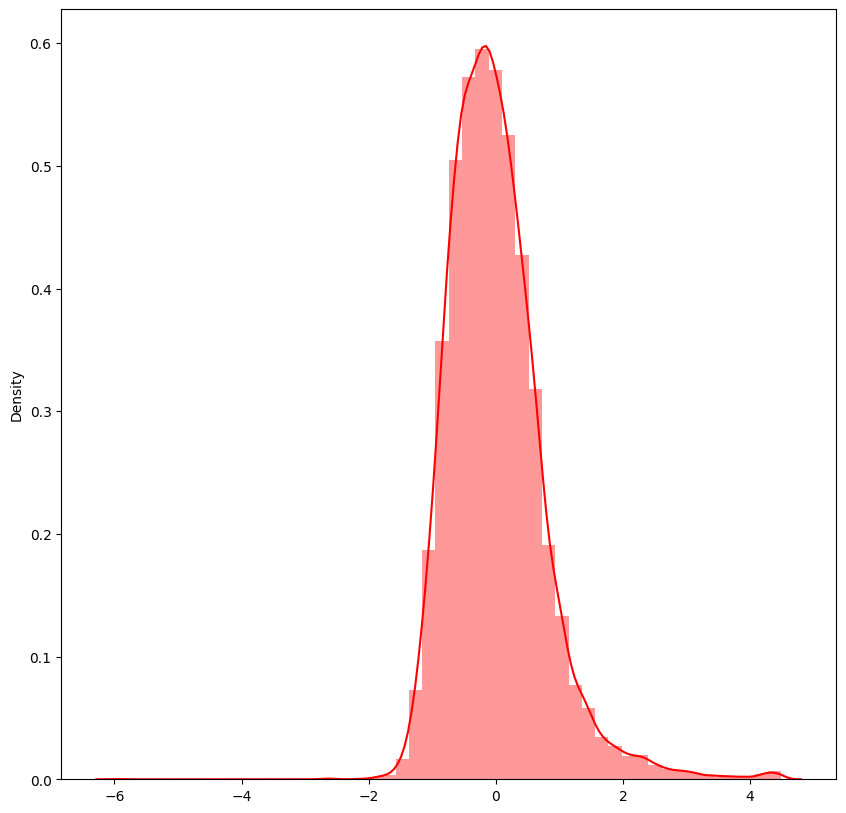

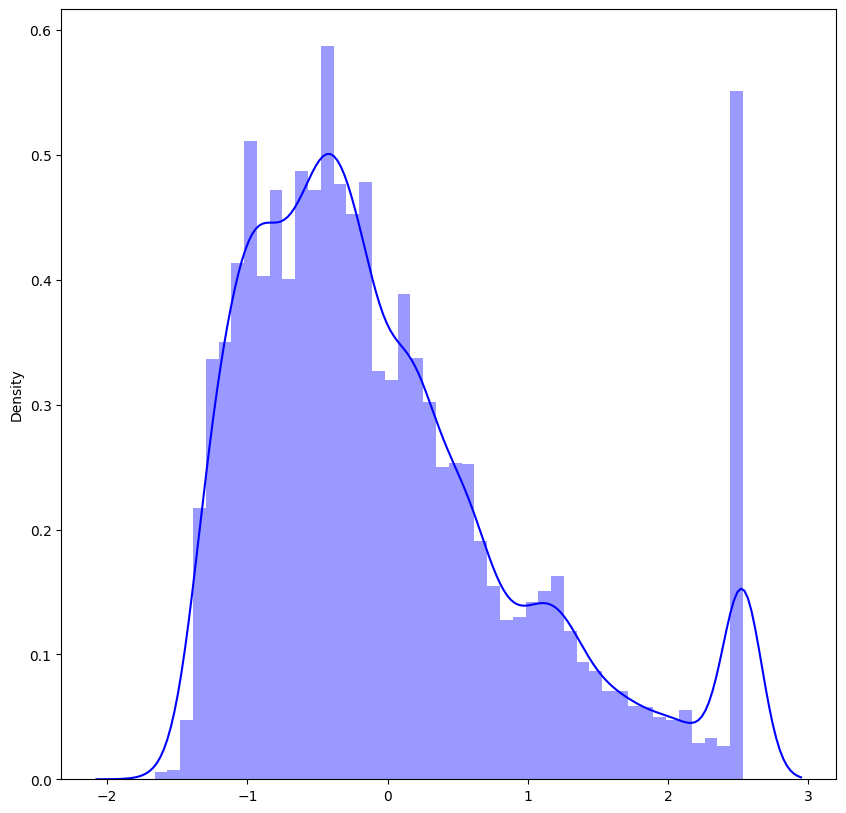

In [33]:
distplot(y_pred, 1)
distplot(y_true, 2)

distplot is basically a histogram which shows the density of the predicted values in comparision with the actual values, as we see most of our actual data lies between -2 and +2,
  so is the case with our predicted data and hence we can infer that our predicted values are close enough to the actual ones.

# Part II - Neural Networks

### Reading the data from CSV and storing in a dataframe

In [34]:
df = pd.read_csv('housing_data.csv')
assert df.shape == (20000,11)

### Dropping columns having irrelevant/NaN data in them

In [35]:
df.dropna(axis=1, inplace = True)
assert df.shape == (20000,9)

### Scaling the dataset

In [36]:
scaler= MinMaxScaler()
scaler.fit(df)
scaled_values = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_values, columns=df.columns)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


## An overview of our model
The image below shows the structure of the Neural Network we will be building in this assignment. The layers are labeled and the number of neurons for that particular layer are mentioned below them in parentheses.

![NN_4_layer_final.jpg]( 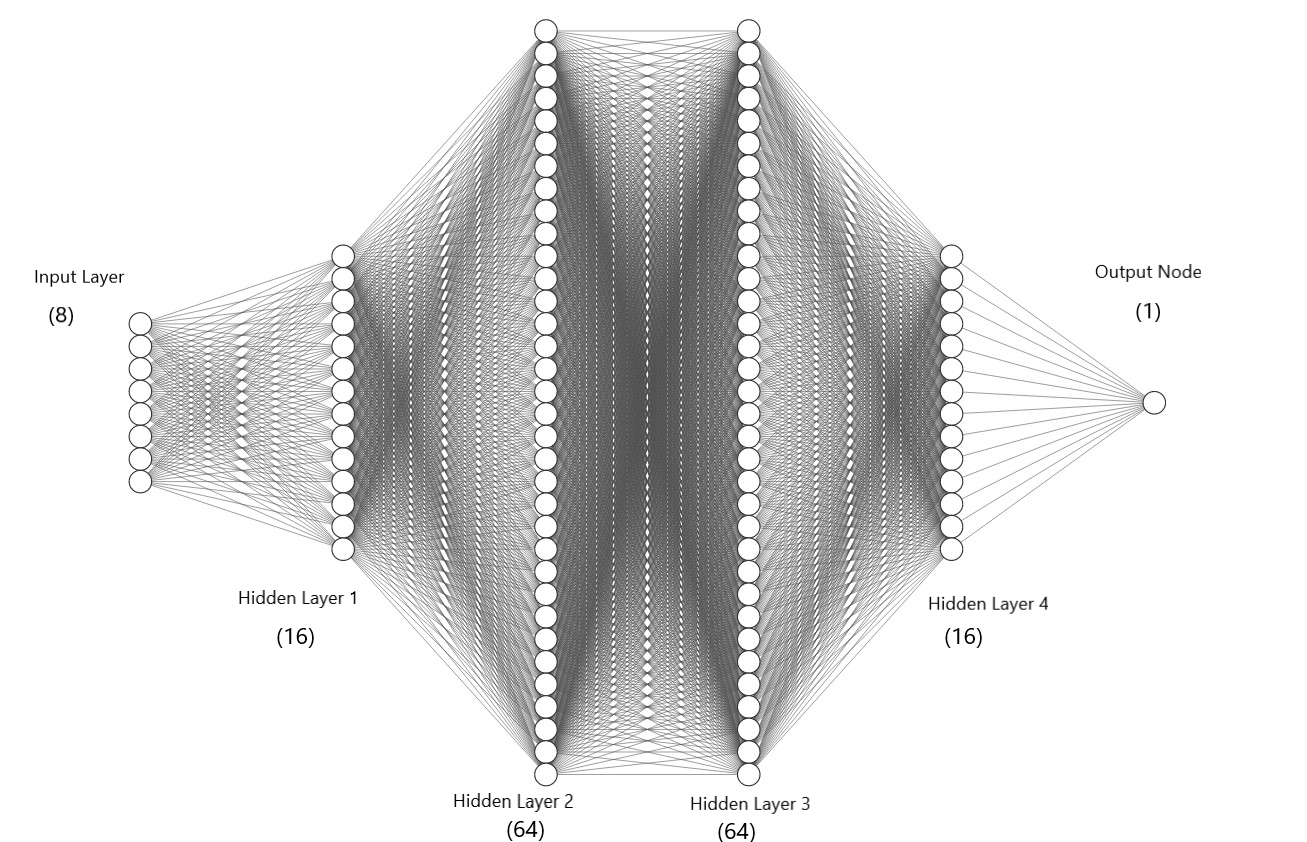)

> **Note**: The number of neurons in the diagram is different than the actual number given below them in parantheses for representation purposes. The number written is the actual number of neurons you will use for your architecture

## Architecture:

In the subsequent cells we will be implementing a **five-layer fully-connected neural network**. The network has an input dimension of I, four hidden layers dimensions of H1, H2, H3, and H4 and performs regression. Hence the output layer will consist of 1 neuron.

We train the network with Mean Squraed Error loss function and L2 regularization on the weight matrices. The network uses a ReLU nonlinearity in between the hidden layers and after the output layer.

In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - ReLU - fully connected layer -ReLU - fully connected layer -ReLU - fully connected layer -RelU

The outputs of the fifth fully-connected layer give us the result

## Terminologies used for describing the computations of the Neural Network:
* Superscript $[h]$ denotes a quantity associated with the $h^{th}$ layer.
    - Example: $a^{[h]}$ is the $h^{th}$ layer activation. $W^{[h]}$ and $b^{[h]}$ are the $h^{th}$ layer parameters.
* Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example.
    - Example: $y^{(i)}$ is the ground truth label corresponding to the $i^{th}$ training example.



* A layer of the neural network consists of:
    - a weight matrix $W^{[h]}$of shape (size of current layer, size of previous layer)
    - a bias vector $b^{[h]} $of shape (size of current layer, 1)
    - an activation function $ g^{[h]} $
* Computation in a layer $h$ of the neural network can be described as follows:
  - Let $a^{[h-1]}$ be the activations of the previous layer or input data (if current layer is first hidden layer), of shape (size of previous layer, number of examples).
  - Let $ z^{[h]} $ be the pre-activation value. Then, $ z^{[h]} $ is computed as :
  $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
  where $ . $ denotes matrix multiplication.
  So, $z^{[h]}$ will be of shape (size of current layer, number of examples).
  - Let $a^{[h]}$ denote post activation value. It is computed as:
  $$ a^{[h]} = g^{[h]}(z^{[h]}) $$
  Note that shape of $a^{[h]}$ is same as that of $a^{[h]}$.
  
  - Also note that $A^{[0]}$ is nothing but $X$, the input data.

This function carries out computations of a single layer of the neural network:
 $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
 $$ a^{[h]} = g^{[h]}(z^{[h]}) $$

## Step 1: Initializing the parameters (weights and biases)



In the next function, weights are initialized to random values in the range [0, 0.1) using np.random.rand appropriately and biases are initialized to zero

HINT : Initialise weights using numpy.random.rand which gives numbers between [0,1) and then convert all the numbers in this numpy array from [0,1) to [0,0.1) by dividing by a certain number

In [37]:
def Initialization(I, H1, H2, H3, H4, O):
    '''
    Weights are initialized to random values in the range [0, 0.1) using np.random.rand appropriately and
    biases are initialized to zero. The dimensions of the
    parameters as as follows:-

          W1: First layer weights; has shape (H1, I)
          b1: First layer biases; has shape (H1, 1)
          W2: Second layer weights; has shape (H2, H1)
          b2: Second layer biases; has shape (H2, 1)
          W3: Third layer weights; has shape (H3, H2)
          b3: Third layer biases; has shape (H3, 1)
          W4: Fourth layer weights; has shape (H4,H3)
          b4: Fourth layer biases; has shape (H4, 1)
          W5: Fifth layer weights has shape (O,H4)
          b5: Fifth layer biases; has shape (O,1)

          Inputs:
          - I: The number of features of the input data.
          - H1: The number of neurons in the hidden layer - 1.
          - H2: The number of neurons in the hidden layer - 2.
          - H3: The number of neurons in the hidden layer - 3.
          - H4: The number of neurons in the hidden layer - 4.
          - O: The number of outputs(i.e. 1).

          Outputs:
          - paramters_final: List containing of parameters
          after they are initialized with appropriate values in this order:
          [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 ]
        '''

    # START TODO ################
    b1 = np.zeros((H1,1))
    b2 = np.zeros((H2,1))
    b3 = np.zeros((H3,1))
    b4 = np.zeros((H4,1))
    b5 = np.zeros((O,1))

    W1 = np.random.rand(H1,I)/10
    W2 = np.random.rand(H2,H1)/10
    W3 = np.random.rand(H3,H2)/10
    W4 = np.random.rand(H4,H3)/10
    W5 = np.random.rand(O,H4)/10

    parameters_final = [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5]
    return parameters_final
    # END TODO ###################
    raise NotImplementedError()

In [38]:
#Sample test case
np.random.seed(2)
tln = Initialization(2, 3, 2, 1, 1, 1)
assert tln[0].shape == (3, 2)
assert tln[1].shape == (3, 1)
assert tln[2].shape == (2, 3)
assert tln[3].shape == (2, 1)
assert tln[4].shape == (1, 2)
assert tln[5].shape == (1, 1)
assert tln[6].shape == (1, 1)
assert tln[7].shape == (1, 1)
assert tln[8].shape == (1, 1)
assert tln[9].shape == (1, 1)
assert np.allclose(tln[0][0][0],0.04359949021420038)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [39]:
# hidden test cases. Do not modify

> Similarly add 2 cells after every function so that after every cell containg a FUNCTION, there are 2 cells after that containing test cases for that particular function

## Step 2: Implement the activation function

Activation functions used:

$$relu(z) = max(0, z)$$

In [40]:
def relu(x):

    # START TODO ################
    return np.maximum(0,x)
    # END TODO ###################
    raise NotImplementedError()

In [41]:
# sample test case
assert np.allclose(relu(np.array([[3,-4]])), np.array([[3,0]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [42]:
# hidden test cases. Do not modify

## Step 3: Forward propagation

In [43]:
def feed_forward(X, params):
    '''
    Using the formulae given below, apply forward propagation for each layer according to the defined architecture

    z = wX + b
    a = g(z)  {g being the non linear function i.e the activation function}

    Inputs:
    - X : Input data of shape (8, total_number_of_rows). Each X[i] is a feature and each X[:][i] is a training sample
    - params: List containing the parameters of the model

    Outputs:
    - y_out : predicted price
    - l : List containing the activation and linear outputs of each layer in the following fashion
      [z1,a1,z2,a2,z3,a3,z4,a4,z5,a5]
    '''

    # START TODO ################
    W1,b1,W2,b2,W3,b3,W4,b4,W5,b5 = params

    m = X.shape[1]
    z = np.dot(W1,X) + b1
    a = relu(z)
    l = [z,a]

    z = np.dot(W2,a) + b2
    a = relu(z)
    l.extend([z,a])

    z = np.dot(W3,a) + b3
    a = relu(z)
    l.extend([z,a])

    z = np.dot(W4,a) + b4
    a = relu(z)
    l.extend([z,a])

    z = np.dot(W5,a) + b5
    y_out = z
    l.append(z)
    return y_out,l

    # END TODO ###################
    raise NotImplementedError()

In [44]:
np.random.seed(2)
para = Initialization(6, 3, 2, 2, 1, 1)
y_forward,l = feed_forward(np.random.rand(6,10), para)
assert y_forward.shape == (1, 10)
assert np.allclose(y_forward[0][5], 1.2063488250870311e-06)
assert l[0].shape==(3,10)
assert l[2].shape==(2,10)
assert l[6].shape==(1,10)
assert np.allclose(l[0][0][1], 0.11645815161695633)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [45]:
# hidden test cases. Do not modify

## Step 4: Calculating the loss

(*Loss*) $L = \frac{1}{2m} * \sum({yd -y\_pred})^{2} $ <br>

where $yd$ is the desired value of y i.e. the one present in our set whereas $y\_pred$ is the value of target we have predicted, and m is the no of examples. <br>


In [46]:
def loss_compute(y_pred, yd):
    '''
    Inputs:
    - y_pred: numpy array containing predicted values of target
    - yd: numpy array containing desired values of y given in the
    dataset

    Outputs:
    - loss: Calculate and return the loss using the above formula
    '''
    # START TODO ################
    m = y_pred.shape[1]
    loss = np.sum((yd - y_pred)**2)/(2*m)
    return loss
    # END TODO ###################
    raise NotImplementedError()

In [47]:
# TEST CASE 1

sample_loss = loss_compute(np.array([[1,1]]) , np.array([[1,0]]))
assert np.allclose(sample_loss,0.25)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [48]:
# hidden test cases. Do not modify

## Step 5: Regularization
It is a technique that discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. It improves the generalization capability of a model, i.e. its performance on unseen test examples.

**Step 5: A function to add regularization by sum of squares so as to prevent overfitting the data**




$$J_{regularized} =  \underbrace{\frac{1}{2m}\sum_{i=1}^{m} (y^{(i)}-a^{[L](i)})^{2}}_{\text{Mean Squared Cost}} +\underbrace{\frac{1}{m}\frac{\lambda}{2}\sum_{l}\sum_{k}\sum_{j}W_{k.j}^{[l]2}}_{\text{L2 regularization cost}}$$

where (k, j) refer to the shape of that pariculat W (weight matrix) and $ l $ refers to the layer number.


You have already implemented Mean Squared Cost function in the last cell. Now in the function below, you'll implement the L2 regularization cost using the formula given

HINT : Try to see what the two inner summations $ \sum_{k}\sum_{j} $ of a particular weight matrix(or any random matrix) looks like. The code for the double summation summed over all layers of our Network, is much much easier than the formula

In [49]:
def regularization_L2(lmbda, W1, W2, W3, W4, W5, m):
    '''
    Inputs:
    - lmbda: Regularization parameter
    - W1, W2, W3, W4, W5: numpy arrays containing weights of the model
    - m: no of examples

    Outputs:
    - total_reg_loss: sum of L2 regularization loss of each layer
    '''

    # START TODO ################
    total_reg_loss = lmbda*(np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2) + np.sum(W4**2) + np.sum(W5**2))/(2*m)
    return total_reg_loss
    # END TODO ###################
    raise NotImplementedError()

In [50]:
# TEST CASE 1

assert np.allclose(regularization_L2(1,np.array([[1]]),np.array([[1]]),np.array([[1]]),np.array([[1]]),np.array([[1]]),1),2.5)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [51]:
# hidden test cases. Do not modify

## Step 6: Making helper functions for backpropagation
Our next step will be to create some helper functions before starting
backpropagation


### Helper Function 1

We would need derivatives of  the **ReLU** function.

Hint: ReLU function derivative can be calculated in one step using lambda functions. For more information, refer to this link: https://www.w3schools.com/python/python_lambda.asp


Note the following rules for the activation function:
$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} =   \left\{
\begin{array}{ll}
      1 & z>=0 \\
      0& z < 0 \\
\end{array}
\right. $$

Note:
The function relu(z) can be written as A(z) where A stands for activation function.

$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} = \frac{\partial \mathcal{A(z)} }{\partial z} $$

In [52]:
#DERIVATIVE OF RELU
def drelu(x):

    # START TODO ################
    return np.where(x>=0,1,0)
    # END TODO ###################
    raise NotImplementedError()

In [53]:
# TEST CASE
assert np.allclose(drelu(np.array([[2,-3]])), np.array([[1,0]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [54]:
# hidden test cases. Do not modify

### Helper Function 2

Here, We would be creating a helper function to calculate and return the values of dz, dW, and db for each layer. Refer to the formulae provided below to get a clear understanding of it's implementation.

Note that the value of **dz depends on the derivatives of activation functions** used for that layer and the functions that we have created above may come in handy.

This function computes  $dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial Z^{[h]}}$, given  $dA^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}}$ and $Z^{[h]}$as inputs. It is based on the following chain rule from calculus:


$$ dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$

$$ dZ^{[h]} = dA^{[h]} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$



  - $ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} = \frac{1}{m} dZ^{[h]} A^{[h-1] T}$
  - $ db^{[h]} = \frac{\partial \mathcal{L} }{\partial b^{[h]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[h](i)}$
  - $ dW_{total}^{[h]} = dW^{[h]} + dW_{reg}^{[h]} $

where $ dW_{reg}^{[h]} = \frac{1}{m} * lambda * weight^{[h]} $

The reason we are calculating $ dW^{[h]} $ and $ db^{[h]} $ is they are the ***learnable parameters*** of our model.

$ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} $ signifies the contribution of $ W^{[h]} $ to our loss function $ \mathcal{L} $.
This gradients $ dW^{[h]} $ and $ db^{[h]} $ will help us perform Gradient Descent on our parameters $ W^{[h]} $ and $ b^{[h]} $

If you want to understand more about derivation of above formulas or just about backpropogation in general, look through these slides once : https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec06.pdf
<br />
<br />

 **NOTE**
: Try to use vectorization as far as possible instead of loops as it would be simpler for you to debug

In [55]:
def back_prop_linear(da_layer, z_layer, input, act_fxn, m, lmbda, weight):
    '''
    Inputs:
    - da_layer: derivative of variable 'a' of that layer
    - z_layer: numpy array of 'z' values for that layer

    - input: input value of that layer, for example, X is the
    input for the first layer, and for other layers, it is the activation A of the previous layer.
    So if you're calculating dz4, dw4 , db4 (layer 4)  - input would  be a3

    - act_fxn: string containing the name of the activation
    function used in that layer,i.e. 'relu' in our case

    - m: number of datapoints
    - lmbda: regularization parameter
    - weight: weights of that particular layer

      Outputs:
    - dz: returns the derivative of linear function variable
    - dW: returns the change in weights for that layer
    - db: returns the change in bias for that layer (you may need to use the `keepdims` parameter to get the correct shape)

    return in the order dz,dw,db
    '''
    dz = da_layer*drelu(z_layer)
    dw = (np.dot(dz, input.T) + lmbda*weight)/m
    db = np.expand_dims(np.sum(dz,axis = 1)/m, axis = 1)


    return dz,dw,db
    raise NotImplementedError()

In [56]:
# TEST CASE
m=1
# previous layer has 2 neurons and current layer has 2 neurons
z_h=np.array([[1],[2]])
da_h=np.array([[0.1],[0.2]])
inp=np.array([[1],[0]])
weights=np.array([[1,1],[2,0]])
dz, dW, db = back_prop_linear(da_h, z_h, inp, 'relu' , m, 1, weights)
assert np.allclose(dz,np.array([[0.1],[0.2]]))
assert np.allclose(dW,np.array([[1.1,1],[2.2,0]]))
assert np.allclose(db,np.array([[0.1],[0.2]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [57]:
# hidden test cases. Do not modify

### Helper Function 3

We would need a helper function to calculate the derivatives of activation function variables

We will calculate dA for the last layer separately in the subsequent function.

For all other layers, we proceed as follows :



Using this formula

  - $ Z^{[h]} = W^{[h]}.A^{[h-1]}+b^{[h]}$


  - $ dA^{[h-1]} = \frac{\partial \mathcal{L} }{\partial A^{[h-1]}} = W^{[h] T} dZ^{[h]}$

In [58]:
def back_prop_actf(W_plusone, dz_plusone):
    '''
    Inputs:
    - W_plusone: Weights of the next layer
    - dz_plusone: Derivative of the linear function of the next
    layer

    Outputs:
    - act_dtive: returns the derivative of activation function variable

    NOTE : This function can be used to find dA for EVERY layer EXCEPT the last layer
    '''
    return np.dot(W_plusone.T, dz_plusone)
    raise NotImplementedError()

In [59]:
der=back_prop_actf(np.array([[1],[2]]), np.array([[2],[3]]))
assert np.allclose(der,np.array([[8]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [60]:
# hidden test cases. Do not modify

## Combining all the helper functions for Backpropogation

Now we will be creating the main function for backpropagation where we combine all the helper functions to update the weights. We will first compute errors at the last layer and backpropagate them through the network to get the desired $dW$ and $db$ for each layer.

We would using a single function to return these values as the formula remains the same.

To backpropagate through this network, we know that the output is, $ ypred = A^{[H]} = ReLU(Z^{[H]})$. Your code thus needs to compute $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$. To do so, use this formula:
$$ dA^{[H]} = -({yd -A^{[H]}})$$

**Remember: This is only for the last layer, use the above helper function for the other layers.**

**HINT:** Use the back_prop_linear function to obtain $dz,dW,db$ at each layer.

So to sum up all the Backpropogation helper functions and combine them in the next function :

Calculate $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$ for the **last layer** using the forumula:
$$ dA^{[H]} = -({yd -A^{[H]}})$$

After that , calculate  $ dW^{[H]}$ ,  $db^{[H]}$ and  $ dz^{[H]} $ using back_prop_linear function.

HINT : You already have $ dA^{[5]} $ using the formula given above. From that you can calculate $ dW^{[5]}$ ,  $db^{[5]}$ and  $ dz^{[5]} $ using back_prop_linear function

Now use back_prop_actf to find $ dA^{[4]} $ followed by back_prop_linear to find $ dW^{[4]}$ ,  $db^{[4]}$ and  $ dz^{[4]} $

Continue this process till you have the gradients for all 5 Weights and Biases

In [61]:
def Backpropagation1(X, yd, l, y_pred, parameters, lmbda):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - l: list containing values of 'z' and 'a' of each layer
      - parameters: list containing weights and biases of each layer
      - lmbda: regularization parameter

      Outputs:
      - grad: dictionary containing the change in the values of weights
      and biases with keys 'dW1','dW2','dW3','dW4','dW5','db1','db2','db3','db4','db5'
    '''

    # START TODO ################

    grad = {}
    dA5 = -1*(yd - y_pred)

    m = X.shape[1]
    W1,b1,W2,b2,W3,b3,W4,b4,W5,b5 = parameters
    z1,a1,z2,a2,z3,a3,z4,a4,z5 = l

    # Layer 5
    dz5, dW5, db5 = back_prop_linear(dA5, z5, a4, 'relu', m, lmbda, W5)
    grad['dW5'], grad['db5'] = dW5, db5
    dA4 = back_prop_actf(W5, dz5)

    # Layer 4
    dz4, dW4, db4 = back_prop_linear(dA4, z4, a3, 'relu', m, lmbda, W4)
    grad['dW4'], grad['db4'] = dW4, db4
    dA3 = back_prop_actf(W4, dz4)

    # Layer 3
    dz3, dW3, db3 = back_prop_linear(dA3, z3, a2, 'relu', m, lmbda, W3)
    grad['dW3'], grad['db3'] = dW3, db3
    dA2 = back_prop_actf(W3, dz3)

    # Layer 2
    dz2, dW2, db2 = back_prop_linear(dA2, z2, a1, 'relu', m, lmbda, W2)
    grad['dW2'], grad['db2'] = dW2, db2
    dA1 = back_prop_actf(W2, dz2)

    # Layer 1
    dz1, dW1, db1 = back_prop_linear(dA1, z1, X, 'relu', m, lmbda, W1)
    grad['dW1'], grad['db1'] = dW1, db1

    return grad
    # END TODO ###################
    raise NotImplementedError()


In [62]:
grads_check = {'dW1' : np.array([0.00477814 ,0.00262214]),
               'dW2' : np.array([0.00338872 ,0.00096401]),
               'dW3' : np.array([0.00384367 ,0.00093328 ,0.00427237]),
               'dW4' : np.array([0.00477098 ,0.00216877 ,0.00474162]),
               'dW5' : np.array([0.00010706 ,0.00272906]),
               'db1': np.array([-5.70127772e-05]),
               'db2': np.array([-0.00048472]),
               'db3': np.array([-0.00272006]),
               'db4': np.array([-0.00374705]),
               'db5': np.array([-0.4999496])
              }
np.random.seed(4)
parameters = Initialization(2, 2, 3, 3, 2, 1)
X = np.array([[1,2],[2,3]])
y_pred, l = feed_forward(X, parameters)
sample_grads = Backpropagation1(X, np.array([[1,0]]), l, y_pred, parameters, lmbda = 0.1)
for key in grads_check.keys():
    assert np.allclose(grads_check[key],sample_grads[key][0])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [63]:
# hidden test cases. Do not modify

The weights are now updated in each iteration via the learning rules:

$$ W^{[h]} = W^{[h]} - \alpha \text{ } dW^{[h]} $$
$$ b^{[h]} = b^{[h]} - \alpha \text{ } db^{[h]} $$

where h takes value from 1 to 5 for our 4 hidden layers and 1 output node
<br />
<br />

- We are done with most of the code now, yet there is the most important function left to be created - where we will be training our model.

- Refer to the overview again before writing a code for this function.

- You will have to call the above functions repeatedly and update the weights and bias with each iteration

- The values of number of iterations(num_iters), learning rate(eta) and regularization parameter(lmbda) **have been already tuned**. If you wish to experiment on these variables for a better understanding, you are free to do so. The final result, however, will be evaluated using the values given.

## Training your model

For training the model you need to do the following in the next function:
1) You are provided with *X, yd, parameters* as arguments. *X* and *yd* are scaled so **DO NOT** scale them again inside this *training* function

2) Store W1 to W5 and b1 to b5 (weights and biases) in **seperate variables** by accessing the *parameters* argument

3) Initialise an empty list to which you will append the loss of every iteration

4) Now for N number of iterations:
     - compute y_predicted and a5 using feedforward
     
     - compute loss using y_predicted and yd - say loss_1
     
     - calculate regularization loss say loss_2
     
     - total loss = loss_1 + loss_2
     
     - append this to the list you created in step 3
     
     - calculate gradients
     
     - update W1 to W5 and b1 to b5 by using the gradients calculated above
     
     - in the next iteration , when using feed forward use these updated W1 to W5 and b1 to  b5
     
     - And then follow this for N iterations
     
5) Return the history of loss (that list you created in step 3 populated with loss of every iteration) and the trained *W* and *b*

In [64]:
def training(X, yd, parameters, eta = 0.05, num_iters=3000, lmbda = 0.1):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values of shape (1,no. of examples)
      - parameters - The initial parameters of the model (W and b) in the same format as they were returned by the
          Initialization function ie. [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 ]
      - eta: learning rate
      - num_iters: number of iterations
      - lmbda: regularization parameter

      Outputs:
      - losses: list of loss at the start of each iteration
      - parameters: the final TRAINED parameters
      Return in the format : losses,[W1,b1,W2,b2,W3,b3,W4,b4,W5,b5]
    '''
    # START TODO ################
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = parameters
    losses = []

    for i in range(num_iters):
        y_pred, l = feed_forward(X, [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5])
        loss_1 = loss_compute(y_pred, yd)
        loss_2 = regularization_L2(lmbda, W1, W2, W3, W4, W5, X.shape[1])
        total_loss = loss_1 + loss_2
        losses.append(total_loss)

        grads = Backpropagation1(X, yd, l, y_pred, [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5], lmbda)

        W1 = W1 - eta * grads['dW1']
        b1 = b1 - eta * grads['db1']
        W2 = W2 - eta * grads['dW2']
        b2 = b2 - eta * grads['db2']
        W3 = W3 - eta * grads['dW3']
        b3 = b3 - eta * grads['db3']
        W4 = W4 - eta * grads['dW4']
        b4 = b4 - eta * grads['db4']
        W5 = W5 - eta * grads['dW5']
        b5 = b5 - eta * grads['db5']

    parameters = [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5]
    return losses, parameters
    # END TODO ###################
    raise NotImplementedError()


In [65]:
#See the starting of Neural Network section where we decclared the scaled_df dataframe
X_df = scaled_df.iloc[:,0:8] # The first 8 columns are our X variables
Y_df = scaled_df.iloc[:,8:9] # The 9th column or 'median_house_value' is what we are trying to predict
x_train  = X_df.values.T
y_actual = Y_df.values.reshape(1,-1)

In [66]:
#Sample test case
np.random.seed(2)
parameters = Initialization(8, 16, 64, 64, 16, 1)
#ALL ACTIVATION RELU
losses, parameters_final = training(x_train, y_actual,parameters, eta = 0.05, num_iters=4000, lmbda = 0.1)
print(losses[200])
assert np.allclose(losses[200],0.018760000609514545)
print('Sample Test passed', '\U0001F44D')
#You can change num_iters to 10000, will take around 10-15 minutes to train
'''
You can also play around with the model hyper-parameters to see if you can improve on our results
Try changing:
    - The model architecture (number of layers, number of neurons in each layer)
    - The batch size
    - The learning rate

Make sure you set the parameters to their original values before submitting the assignment
'''

KeyboardInterrupt: 

In [ ]:
# hidden test cases. Do not modify

To self-evaluate the result obtained, plot the loss function with respect to the number of iterations and rethink the algorithm if your loss function is not reaching a minimum value.

In [ ]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.05))
plt.show()

> If everything goes well, the above loss plot should be reaching 0.012 - 0.010 after around 3k-4k epochs

In [ ]:
!pip install -U gdown
import gdown
# Convert the Google Drive link to direct-download format
file_id = "1SwPmCB12OGc0Ljjj4_FafBy5b0TKanPJ"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="california_housing_test.csv", quiet=False)

In [ ]:
#Let's see how well our model works on TEST data
df_test  = pd.read_csv('/content/california_housing_test.csv')
scaler = MinMaxScaler()
scaler.fit(df)
test_scaled_data = scaler.transform(df_test)
test_scaled_df = pd.DataFrame(test_scaled_data,columns=df_test.columns) #make sure column names are retained

xtest = test_scaled_df.iloc[:,0:8]
ytest = test_scaled_df.iloc[:,8:9]
xtest  = xtest.values.T
ytest = ytest.values.reshape(1,-1)

ytest_pred = feed_forward(xtest,parameters_final)[0]
print(mean_squared_error(ytest,ytest_pred))

**MNIST Dataset**

In [67]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("hojjatk/mnist-dataset")

# print("Path to dataset files:", path)

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
#DO NOT IMPORT ANY OTHER LIBRARY
#Run these cells as it is
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
from tqdm import tqdm
from copy import deepcopy
import seaborn as sns
try:
    import plotly.graph_objects as go
except:
    !pip install plotly # Or install the plotly library manually
    import plotly.graph_objects as go

import pickle
import datetime
# required only for jupyter notebooks / while running on colab
%matplotlib inline

# set seed
seed = 1
np.random.seed(seed)

In [70]:
import kagglehub
import shutil
import os

# Download dataset (goes to default kagglehub cache)
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

# Your target folder
target_folder = "sample_data/mnist"

# Make sure the folder exists
os.makedirs(target_folder, exist_ok=True)

# Copy all files from the kagglehub download path to sample_data
for file in os.listdir(path):
    shutil.copy(os.path.join(path, file), target_folder)

print("Files copied to:", target_folder)

Files copied to: sample_data/mnist


In [71]:
import pandas as pd

mnistdf = pd.read_csv('/content/sample_data/mnist/mnist_train.csv')
df = mnistdf

scaler= MinMaxScaler()
scaler.fit(df)
scaled_values = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_values, columns=df.columns)

# Normalize pixel values (skip the label column)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:, 1:])  # pixel columns
y = df.iloc[:, 0]  # label column

train_x = X_scaled.T
train_y = pd.get_dummies(y).values.T
scaled_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


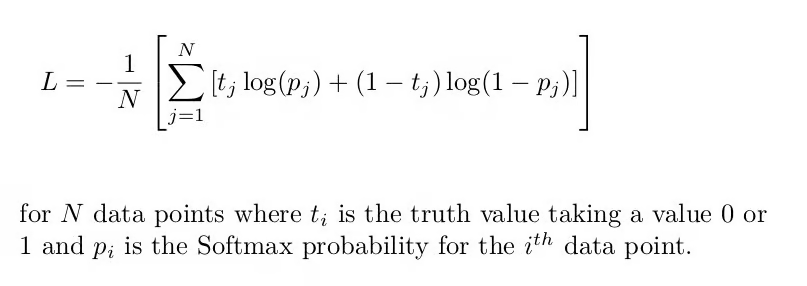

In [72]:
def Initialization(n_x, n_h1, n_h2, n_h3, n_h4, n_y):
    np.random.seed(1)
    parameters = {
        'W1': np.random.randn(n_h1, n_x) * np.sqrt(2. / n_x),
        'b1': np.zeros((n_h1, 1)),
        'W2': np.random.randn(n_h2, n_h1) * np.sqrt(2. / n_h1),
        'b2': np.zeros((n_h2, 1)),
        'W3': np.random.randn(n_h3, n_h2) * np.sqrt(2. / n_h2),
        'b3': np.zeros((n_h3, 1)),
        'W4': np.random.randn(n_h4, n_h3) * np.sqrt(2. / n_h3),
        'b4': np.zeros((n_h4, 1)),
        'W5': np.random.randn(n_y, n_h4) * np.sqrt(2. / n_h4),
        'b5': np.zeros((n_y, 1))
    }
    return parameters

In [73]:
def Backpropagation1(X, yd, l, y_pred, parameters, lmbda):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - l: list containing values of 'z' and 'a' of each layer
      - parameters: dictionary containing weights and biases of each layer
      - lmbda: regularization parameter

      Outputs:
      - grad: dictionary containing the gradients of weights and biases
              with keys 'dW1','dW2','dW3','dW4','dW5','db1','db2','db3','db4','db5'
    '''

    grad = {}
    dA5 = -1 * (yd - y_pred)
    m = X.shape[1]

    # Extract weights and biases
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']
    W4, b4 = parameters['W4'], parameters['b4']
    W5, b5 = parameters['W5'], parameters['b5']

    # Extract cached linear/activation outputs
    z1, a1, z2, a2, z3, a3, z4, a4, z5, a5 = l

    # Layer 5
    dz5, dW5, db5 = back_prop_linear(dA5, z5, a4, 'relu', m, lmbda, W5)
    grad['dW5'], grad['db5'] = dW5, db5
    dA4 = back_prop_actf(W5, dz5)

    # Layer 4
    dz4, dW4, db4 = back_prop_linear(dA4, z4, a3, 'relu', m, lmbda, W4)
    grad['dW4'], grad['db4'] = dW4, db4
    dA3 = back_prop_actf(W4, dz4)

    # Layer 3
    dz3, dW3, db3 = back_prop_linear(dA3, z3, a2, 'relu', m, lmbda, W3)
    grad['dW3'], grad['db3'] = dW3, db3
    dA2 = back_prop_actf(W3, dz3)

    # Layer 2
    dz2, dW2, db2 = back_prop_linear(dA2, z2, a1, 'relu', m, lmbda, W2)
    grad['dW2'], grad['db2'] = dW2, db2
    dA1 = back_prop_actf(W2, dz2)

    # Layer 1
    dz1, dW1, db1 = back_prop_linear(dA1, z1, X, 'relu', m, lmbda, W1)
    grad['dW1'], grad['db1'] = dW1, db1

    return grad


In [74]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Subtract max for stability
    return e_z / np.sum(e_z, axis=0, keepdims=True)


In [75]:
def feed_forward(X, params):
    '''
    Using the formulae given below, apply forward propagation for each layer according to the defined architecture

    z = wX + b
    a = g(z)  {g being the non linear function i.e the activation function}

    Inputs:
    - X : Input data of shape (8, total_number_of_rows). Each X[i] is a feature and each X[:][i] is a training sample
    - params: Dictionary containing the parameters of the model

    Outputs:
    - y_out : predicted price
    - l : List containing the activation and linear outputs of each layer in the following fashion
      [z1,a1,z2,a2,z3,a3,z4,a4,z5,a5]
    '''

    # Extract weights and biases from params dictionary
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    W4 = params['W4']
    b4 = params['b4']
    W5 = params['W5']
    b5 = params['b5']

    m = X.shape[1]  # Number of training examples

    # Forward propagation through layers
    z = np.dot(W1, X) + b1
    a = relu(z)
    l = [z, a]

    z = np.dot(W2, a) + b2
    a = relu(z)
    l.extend([z, a])

    z = np.dot(W3, a) + b3
    a = relu(z)
    l.extend([z, a])

    z = np.dot(W4, a) + b4
    a = relu(z)
    l.extend([z, a])

    z = np.dot(W5, a) + b5
    y_out = z
    l.append(z)

    return y_out, l


In [76]:
import numpy as np

def loss_entropy(y_pred, yd):
    '''
    Inputs:
    - y_pred: numpy array of shape (num_classes, m), predicted probabilities
    - yd: numpy array of shape (num_classes, m), one-hot encoded true labels

    Output:
    - loss: scalar cross-entropy loss
    '''
    # START TODO ################
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    m = y_pred.shape[1]  # number of examples
    loss = -np.sum(yd * np.log(y_pred)) / m
    return loss
    # END TODO ###################
    raise NotImplementedError()


In [77]:
def Update(parameters, grads, learning_rate):
    for l in range(1, len(parameters) // 2 + 1):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]
    return parameters

In [78]:
def Predict(X, parameters):
    A, _ = feed_forward(X, parameters)
    predictions = np.argmax(A, axis=0)
    return predictions

In [79]:
def Accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true) * 100

In [80]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Load and process training data
df = pd.read_csv('/content/sample_data/mnist/mnist_train.csv')

scaler = MinMaxScaler()
X_train = scaler.fit_transform(df.iloc[:, 1:])  # Fit only on pixel data
y_train = df.iloc[:, 0]

train_x = X_train.T
train_y = pd.get_dummies(y_train).values.T

# Load and process test data
df_test = pd.read_csv('/content/sample_data/mnist/mnist_test.csv')

X_test = scaler.transform(df_test.iloc[:, 1:])  # Transform pixel data only
y_test = df_test.iloc[:, 0]

xtest = X_test.T
ytest = pd.get_dummies(y_test).values.T


In [81]:
def feed_forward(X, params):
    '''
    Using the formulae given below, apply forward propagation for each layer according to the defined architecture

    z = wX + b
    a = g(z)  {g being the non linear function i.e the activation function}

    Inputs:
    - X : Input data of shape (8, total_number_of_rows). Each X[i] is a feature and each X[:][i] is a training sample
    - params: List containing the parameters of the model

    Outputs:
    - y_out : predicted price
    - l : List containing the activation and linear outputs of each layer in the following fashion
      [z1,a1,z2,a2,z3,a3,z4,a4,z5,a5]
    '''

    # START TODO ################
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    W4 = params['W4']
    b4 = params['b4']
    W5 = params['W5']
    b5 = params['b5']


    m = X.shape[1]
    z = np.dot(W1,X) + b1
    a = relu(z)
    l = [z,a]

    z = np.dot(W2,a) + b2
    a = relu(z)
    l.extend([z,a])

    z = np.dot(W3,a) + b3
    a = relu(z)
    l.extend([z,a])

    z = np.dot(W4,a) + b4
    a = relu(z)
    l.extend([z,a])

    z = np.dot(W5,a) + b5
    a = softmax(z)
    y_out = a
    l.extend([z,a])
    return y_out,l

    # END TODO ###################
    raise NotImplementedError()

In [82]:
def Model(X_train, y_train, X_test, y_test, layers_dims, learning_rate=0.01, epochs=1000, lambda_reg=0, parameters=-1):
    epochs += 1

    if parameters == -1:
      parameters = Initialization(layers_dims[0],layers_dims[1],layers_dims[2],layers_dims[3],layers_dims[4],layers_dims[5])

    losses = []
    acc_tests = []
    acc_trains = []
    best_parameters = parameters
    best_epoch = 0

    for i in range(epochs):
        A, caches = feed_forward(X_train, parameters)
        loss = loss_entropy(A, y_train)
        grads = Backpropagation1(X_train, y_train, caches, A, parameters, lambda_reg)



        y_pred_train = Predict(X_train, parameters)
        y_train_labels = np.argmax(y_train, axis=0)
        acc_train = Accuracy(y_pred_train, y_train_labels)

        y_pred_test = Predict(X_test, parameters)
        y_test_labels = np.argmax(y_test, axis=0)
        acc_test = Accuracy(y_pred_test, y_test_labels)

        print(f"Epoch {i} | Loss: {loss:.4f} | Train Acc: {acc_train:.2f}% | Test Acc: {acc_test:.2f}% | Best_epoch:{best_epoch}")
        if(len(acc_tests)!=0 and acc_test >= max(acc_tests)):
          #update best model if it's the bes
          best_parameters = parameters
          best_epoch = i

        # add to losses
        losses.append(loss)
        acc_tests.append(acc_test)
        acc_trains.append(acc_train)

        parameters = Update(parameters, grads, learning_rate)
    print(f"Best accuracy in epoch:{best_epoch} | loss:{losses[best_epoch]} | Train Acc:{acc_trains[best_epoch]} | Test Acc:{acc_tests[best_epoch]}")
    return best_parameters,losses,acc_trains,acc_tests

In [83]:
W = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.5)

Epoch 0 | Loss: 2.3984 | Train Acc: 9.39% | Test Acc: 9.01% | Best_epoch:0
Epoch 1 | Loss: 2.3804 | Train Acc: 12.32% | Test Acc: 12.28% | Best_epoch:0
Epoch 2 | Loss: 2.2536 | Train Acc: 20.14% | Test Acc: 21.06% | Best_epoch:1
Epoch 3 | Loss: 2.1685 | Train Acc: 25.98% | Test Acc: 26.40% | Best_epoch:2
Epoch 4 | Loss: 2.0985 | Train Acc: 25.48% | Test Acc: 26.06% | Best_epoch:3
Epoch 5 | Loss: 2.5514 | Train Acc: 18.43% | Test Acc: 18.74% | Best_epoch:3
Epoch 6 | Loss: 2.1242 | Train Acc: 12.41% | Test Acc: 11.92% | Best_epoch:3
Epoch 7 | Loss: 2.1309 | Train Acc: 19.06% | Test Acc: 19.19% | Best_epoch:3
Epoch 8 | Loss: 2.2069 | Train Acc: 18.50% | Test Acc: 18.96% | Best_epoch:3


KeyboardInterrupt: 

In [ ]:
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)  # اگر مسیر وجود نداشت، بسازش

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(W, f)

In [99]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train

model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.5,parameters=-1,epochs=200)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

EOFError: Ran out of input

In [ ]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train

model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 64, 128, 128, 64, 10],learning_rate = 0.1,parameters=model,epochs=501)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(W, f)

In [ ]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train

model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 64, 128, 128, 64, 10],learning_rate = 0.8,parameters=model,epochs=501)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(W, f)

In [ ]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train
model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.5,parameters=model,epochs=500)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train
model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.05,parameters=model,epochs=500)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train
model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.05,parameters=model,epochs=1000,lambda_reg=0.1)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# train
model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.5,parameters=-1,epochs=200,lambda_reg=0.1)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train
model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.01,parameters=model,epochs=1000,lambda_reg=0.05)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train
model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.005,parameters=model,epochs=200,lambda_reg=0)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import os
import pickle

save_path = '/content/drive/MyDrive/mnist/'

files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

if not files:
    print("No model file found!")
else:
    latest_file = sorted(files)[-1]
    latest_path = os.path.join(save_path, latest_file)

    with open(latest_path, 'rb') as f:
        model = pickle.load(f)

    print(f"Model is now updated: {latest_file}")

# train
model = Model(X_train=train_x, y_train=train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64, 64, 32, 10],learning_rate = 0.05,parameters=model,epochs=200,lambda_reg=0)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

In [92]:
import matplotlib.pyplot as plt

# Assuming you have these lists: losses, acc_trains, acc_tests
# These should be collected during the training process

def plot_training_metrics(losses, acc_trains, acc_tests):
    epochs = range(1, len(losses) + 1)

    plt.figure(figsize=(14, 6))

    # Plot the loss values (Training and Test loss)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, losses, label="Train Loss", color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss over Epochs")
    plt.legend()

    # Plot the accuracy values (Training and Test accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_trains, label="Train Accuracy", color='green')
    plt.plot(epochs, acc_tests, label="Test Accuracy", color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy over Epochs")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# You should already have the losses, acc_trains, and acc_tests collected from the training loop
plot_training_metrics(losses, acc_trains, acc_tests)


NameError: name 'acc_trains' is not defined

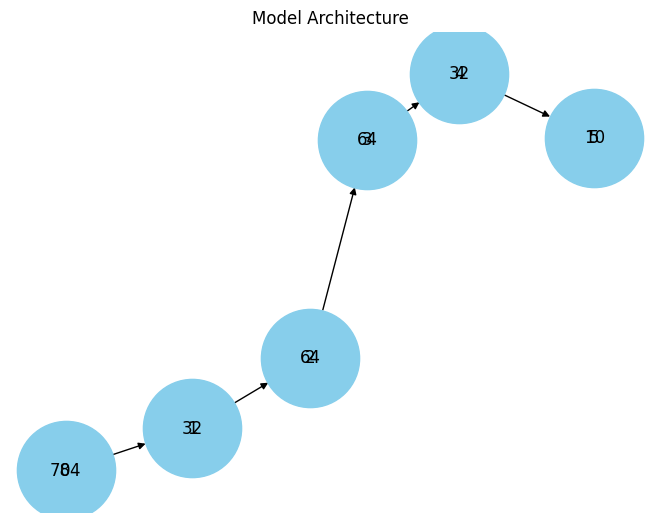

In [91]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_model_architecture(layers_dims):
    G = nx.DiGraph()

    # Add layers as nodes
    for i, size in enumerate(layers_dims):
        G.add_node(i, size=size)

    # Add edges between layers (fully connected)
    for i in range(len(layers_dims) - 1):
        G.add_edge(i, i + 1)

    # Draw the graph (with node labels as layer sizes)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=12)
    labels = nx.get_node_attributes(G, 'size')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)
    plt.title("Model Architecture")
    plt.show()

# Example usage
plot_model_architecture([784, 32, 64, 64, 32, 10])

**9 Parameters Model**

In [84]:
def Initialization9(n_x, n_h1, n_h2, n_h3, n_h4, n_h5, n_h6, n_h7, n_h8, n_h9, n_h10, n_y):
    np.random.seed(1)
    parameters = {
        'W1': np.random.randn(n_h1, n_x) * np.sqrt(2. / n_x),
        'b1': np.zeros((n_h1, 1)),
        'W2': np.random.randn(n_h2, n_h1) * np.sqrt(2. / n_h1),
        'b2': np.zeros((n_h2, 1)),
        'W3': np.random.randn(n_h3, n_h2) * np.sqrt(2. / n_h2),
        'b3': np.zeros((n_h3, 1)),
        'W4': np.random.randn(n_h4, n_h3) * np.sqrt(2. / n_h3),
        'b4': np.zeros((n_h4, 1)),
        'W5': np.random.randn(n_h5, n_h4) * np.sqrt(2. / n_h4),
        'b5': np.zeros((n_h5, 1)),
        'W6': np.random.randn(n_h6, n_h5) * np.sqrt(2. / n_h5),
        'b6': np.zeros((n_h6, 1)),
        'W7': np.random.randn(n_h7, n_h6) * np.sqrt(2. / n_h6),
        'b7': np.zeros((n_h7, 1)),
        'W8': np.random.randn(n_h8, n_h7) * np.sqrt(2. / n_h7),
        'b8': np.zeros((n_h8, 1)),
        'W9': np.random.randn(n_h9, n_h8) * np.sqrt(2. / n_h8),
        'b9': np.zeros((n_h9, 1)),
        'W10': np.random.randn(n_h10, n_h9) * np.sqrt(2. / n_h9),
        'b10': np.zeros((n_h10, 1)),
        'W11': np.random.randn(n_y, n_h10) * np.sqrt(2. / n_h10),
        'b11': np.zeros((n_y, 1))
    }
    return parameters


In [85]:
def back_prop_linear9(da_layer, z_layer, a_prev, act_fxn, m, lmbda, weight):
    '''
    Inputs:
    - da_layer: derivative of variable 'a' of that layer, shape (layer_size, m)
    - z_layer: pre-activation values for that layer, shape (layer_size, m)
    - a_prev: activations from the previous layer (or X for the first layer), shape (prev_layer_size, m)
    - act_fxn: activation function used in this layer ('relu' supported)
    - m: number of training examples
    - lmbda: L2 regularization parameter
    - weight: weight matrix of this layer, shape (layer_size, prev_layer_size)

    Outputs:
    - dz: derivative of z, shape (layer_size, m)
    - dw: gradient w.r.t. weights, shape (layer_size, prev_layer_size)
    - db: gradient w.r.t. bias, shape (layer_size, 1)
    '''

    # Activation derivative
    if act_fxn == 'relu':
        dz = da_layer * drelu(z_layer)
    # elif act_fxn == 'sigmoid':
    #     dz = da_layer * dsigmoid(z_layer)
    # elif act_fxn == 'tanh':
    #     dz = da_layer * dtanh(z_layer)
    else:
        raise ValueError(f"Unsupported activation function: {act_fxn}")

    # Compute gradients
    dw = (np.dot(dz, a_prev.T) + lmbda * weight) / m
    db = np.sum(dz, axis=1, keepdims=True) / m

    return dz, dw, db


In [86]:
def Backpropagation9(X, yd, cache, y_pred, parameters, lmbda):
    '''
    Performs backpropagation on an 11-layer (10 hidden + 1 output) neural network.

    Inputs:
    - X: Input features, shape (n_features, m)
    - yd: Ground truth labels, shape (n_classes, m)
    - cache: List of z and a values for each layer, in order: [z1, a1, z2, a2, ..., z11, a11]
    - y_pred: Output probabilities from softmax, shape (n_classes, m)
    - parameters: Dictionary containing weights and biases (W1–W11, b1–b11)
    - lmbda: Regularization parameter

    Output:
    - grad: Dictionary of gradients for weights and biases ('dW1'–'dW11', 'db1'–'db11')
    '''

    grad = {}
    m = X.shape[1]

    # Unpack cached activations and pre-activations
    z_vals = cache[::2]  # z1, z2, ..., z11
    a_vals = cache[1::2]  # a1, a2, ..., a11

    # Output layer (Softmax loss derivative)
    dZ = y_pred - yd
    a_prev = a_vals[-2]  # a10
    W = parameters['W11']
    grad['dW11'] = (1/m) * np.dot(dZ, a_prev.T) + (lmbda/m) * W
    grad['db11'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA = np.dot(W.T, dZ)

    # Loop through hidden layers in reverse (layer 10 to 1)
    for i in reversed(range(10)):
        z = z_vals[i]
        a_prev = X if i == 0 else a_vals[i-1]
        W = parameters[f'W{i+1}']

        dz, dw, db = back_prop_linear9(dA, z, a_prev, 'relu', m, lmbda, W)
        grad[f'dW{i+1}'] = dw
        grad[f'db{i+1}'] = db
        if i > 0:
            dA = back_prop_actf(W, dz)  # Don't compute dA0 since we don't need it

    return grad


In [87]:
def feed_forward9(X, params):
    '''
    Forward propagation for 10-layer neural network (9 hidden layers + 1 output).

    Inputs:
    - X: Input data of shape (features, examples)
    - params: Dictionary containing weights W1-W10 and biases b1-b10

    Outputs:
    - y_out: Final output after softmax
    - l: List of intermediate z and a values [z1,a1,z2,a2,...,z10,a10]
    '''

    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W3 = params['W3']
    b3 = params['b3']
    W4 = params['W4']
    b4 = params['b4']
    W5 = params['W5']
    b5 = params['b5']
    W6 = params['W6']
    b6 = params['b6']
    W7 = params['W7']
    b7 = params['b7']
    W8 = params['W8']
    b8 = params['b8']
    W9 = params['W9']
    b9 = params['b9']
    W10 = params['W10']
    b10 = params['b10']
    W11 = params['W11']
    b11 = params['b11']

    l = []
    a = X

    z1 = np.dot(W1, a) + b1
    a1 = relu(z1)
    l += [z1, a1]

    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    l += [z2, a2]

    z3 = np.dot(W3, a2) + b3
    a3 = relu(z3)
    l += [z3, a3]

    z4 = np.dot(W4, a3) + b4
    a4 = relu(z4)
    l += [z4, a4]

    z5 = np.dot(W5, a4) + b5
    a5 = relu(z5)
    l += [z5, a5]

    z6 = np.dot(W6, a5) + b6
    a6 = relu(z6)
    l += [z6, a6]

    z7 = np.dot(W7, a6) + b7
    a7 = relu(z7)
    l += [z7, a7]

    z8 = np.dot(W8, a7) + b8
    a8 = relu(z8)
    l += [z8, a8]

    z9 = np.dot(W9, a8) + b9
    a9 = relu(z9)
    l += [z9, a9]

    z10 = np.dot(W10, a9) + b10
    a10 = relu(z10)
    l += [z10, a10]

    z11 = np.dot(W11, a10) + b11
    a11 = relu(z11)
    l += [z11, a11]

    return a11, l


In [88]:
def Accuracy(y_pred, y_true):
    if y_true.ndim > 1:  # If y_true is one-hot encoded
        y_true = np.argmax(y_true, axis=0)
    return np.mean(y_pred == y_true) * 100


In [89]:
def Model9(X_train, y_train, X_test, y_test, layers_dims, learning_rate=0.01, epochs=1000, lambda_reg=0, parameters=-1):
    epochs += 1

    if parameters == -1:
        parameters = Initialization9(layers_dims[0], layers_dims[1], layers_dims[2], layers_dims[3], layers_dims[4], layers_dims[5], layers_dims[6], layers_dims[7], layers_dims[8], layers_dims[9], layers_dims[10], layers_dims[11])  # تغییرات در این خط برای 9 لایه

    losses = []
    acc_tests = []
    acc_trains = []
    best_parameters = parameters
    best_epoch = 0

    for i in range(epochs):
        A, caches = feed_forward9(X_train, parameters)
        loss = loss_entropy(A, y_train)

        grads = Backpropagation9(X_train, y_train, caches, A, parameters, lambda_reg)

        y_pred_train = Predict(X_train, parameters)
        y_train_labels = np.argmax(y_train, axis=0)
        acc_train = Accuracy(y_pred_train, y_train_labels)

        y_pred_test = Predict(X_test, parameters)
        y_test_labels = np.argmax(y_test, axis=0)
        acc_test = Accuracy(y_pred_test, y_test_labels)

        print(f"Epoch {i} | Loss: {loss:.4f} | Train Acc: {acc_train:.2f}% | Test Acc: {acc_test:.2f}% | Best_epoch:{best_epoch}")

        if len(acc_tests) != 0 and acc_test >= max(acc_tests):
            best_parameters = parameters
            best_epoch = i

        # Add to losses
        losses.append(loss)
        acc_tests.append(acc_test)
        acc_trains.append(acc_train)

        parameters = Update(parameters, grads, learning_rate)

    print(f"Best accuracy in epoch:{best_epoch} | loss:{losses[best_epoch]} | Train Acc:{acc_trains[best_epoch]} | Test Acc:{acc_tests[best_epoch]}")
    return best_parameters


In [90]:
# import os
# import pickle

# save_path = '/content/drive/MyDrive/mnist/'

# files = [f for f in os.listdir(save_path) if f.endswith('.pkl')]

# if not files:
#     print("No model file found!")
# else:
#     latest_file = sorted(files)[-1]
#     latest_path = os.path.join(save_path, latest_file)

#     with open(latest_path, 'rb') as f:
#         model = pickle.load(f)

#     print(f"Model is now updated: {latest_file}")

# train
model = Model9(train_x, train_y, X_test=xtest, y_test=ytest,
          layers_dims=[784, 32, 64,128,256,512,512,256,128, 64, 32, 10],learning_rate = 0.5,parameters=-1,epochs=200,lambda_reg=0)

# Save to a file
save_path = '/content/drive/MyDrive/mnist/'
os.makedirs(save_path, exist_ok=True)

filename = f'mnist_model_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.pkl'

with open(os.path.join(save_path, filename), 'wb') as f:
    pickle.dump(model, f)

Epoch 0 | Loss: 29.9997 | Train Acc: 0.00% | Test Acc: 0.00% | Best_epoch:0
Epoch 1 | Loss: 10.3645 | Train Acc: 0.00% | Test Acc: 0.00% | Best_epoch:0
Epoch 2 | Loss: 24.1743 | Train Acc: 0.00% | Test Acc: 0.00% | Best_epoch:1
Epoch 3 | Loss: nan | Train Acc: 0.00% | Test Acc: 0.00% | Best_epoch:2
Epoch 4 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:3
Epoch 5 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:4
Epoch 6 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:5
Epoch 7 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:6
Epoch 8 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:7
Epoch 9 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:8
Epoch 10 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:9
Epoch 11 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:10
Epoch 12 | Loss: nan | Train Acc: 9.87% | Test Acc: 9.80% | Best_epoch:11
Epoch 13 | Loss: nan | Train Acc: 9.87% | Test 

KeyboardInterrupt: 